# Libs Import

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
from datetime import timedelta
warnings.filterwarnings("ignore")

# Data Loading

## Информация о клиентах
- **client_id** - ID клиента, внешний ключ к purchases и uplift_train
- **first_issue_date** - Это дата и время, когда клиент впервые был зарегистрирован в системе или получил свою карту лояльности
- **first_redeem_date** - Это дата и время, когда клиент впервые совершил покупку или использовал свою карту лояльности (например, для накопления или списания бонусов)
- **age** - Возраст клиента
- **gender** - Пол клиента

In [2]:
clients = pd.read_csv('data/clients.csv')
clients

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U
...,...,...,...,...,...
400157,fffece623e,2018-05-13 15:09:30,2018-12-27 19:06:39,67,U
400158,ffff3dfff8,2018-11-01 16:06:52,2018-12-07 17:33:47,56,F
400159,ffffaab9da,2017-08-25 18:43:24,2017-12-08 17:53:19,23,F
400160,ffffeb5619,2017-12-05 13:26:28,NaN,62,U


In [3]:
clients[clients['age'] >= 100]

,client_id,first_issue_date,first_redeem_date,age,gender
15,000220a0a7,2017-12-09 17:26:20,2018-10-04 14:59:29,115,M
104,000d599743,2018-08-29 09:08:39,NaN,959,U
363,003d0ec76c,2017-12-08 19:01:44,2019-01-08 22:22:53,115,M
704,0078100002,2017-05-25 14:22:51,NaN,115,M
1822,0130b696fe,2018-07-29 21:25:26,2018-09-27 21:24:14,119,M
...,...,...,...,...,...
399057,ff4fadac9f,2017-04-12 16:37:40,2018-12-05 18:41:35,115,M
399185,ff6614ddd4,2018-12-02 22:41:58,2019-02-08 13:47:56,119,U
399225,ff6aa78c28,2017-08-17 14:00:37,NaN,119,U
399417,ff88abdb79,2017-10-31 18:31:06,2018-09-27 18:56:42,100,U


## Нужно будет пофиксить возраст

<Axes: >

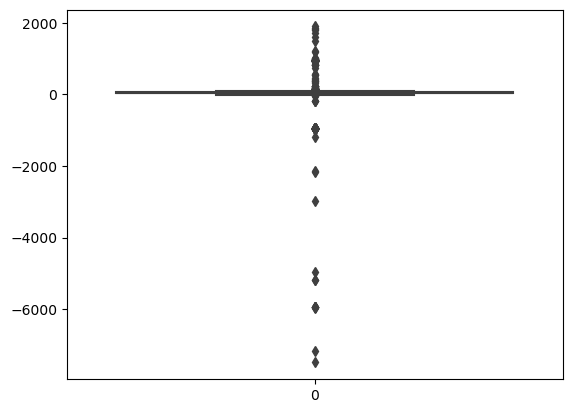

In [4]:
sns.boxplot(data = clients['age'])

In [5]:
uplift_test = pd.read_csv('data/uplift_test.csv')
uplift_test

,client_id
0,000048b7a6
1,000073194a
2,00007c7133
3,00007f9014
4,0000a90cf7
...,...
200118,fffeacbe3e
200119,fffece623e
200120,ffff3dfff8
200121,ffffaab9da


## Информация о товарах

- **product_id** - ID товара, внешний ключ к purchases
- **level_1** - Верхний уровень категории (Продукты питания, Напитки, Косметика etc)
- **level_2** - Подкатегория верхнего уровня (Молочные продукты, Алкогольные напитки, Шампуни etc)
- **level_3** - Более детальная категория (Йогурты, Пиво, Мужские шампуни etc)
- **level_4** -  Самая детализированная категория (Греческий йогурт, Светлое пиво, Шампунь с кератином)
- **segment_id** - Идентификатор сегмента товара. Это может быть группировка товаров по целевой аудитории или назначению (Товары премиум-класса, товары для детей, товары для дома etc)
- **brand_id** - Идентификатор бренда товара
- **vendor_id** - ID поставщика заказа
- **netto** - Вес или объем товара
- **is_own_trademark** - Бинарный признак (0/1), указывающий, является ли товар собственным брендом (private label) компании. 1 - собственный, 0 - товар стороннего производителя
- **is_alcohol** -Бинарный признак (0/1), указывающий, относится ли товар к алкогольной продукции. 1 - относится, 0 - нет

In [6]:
products = pd.read_csv('data/products.csv')
products

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,0003020d3c,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.400,0,0
1,0003870676,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.680,0,0
2,0003ceaf69,c3d3a8e8c6,f2333c90fb,419bc5b424,f6148afbc0,271.0,f597581079,764e660dda,0.500,0,0
3,000701e093,ec62ce61e3,4202626fcb,88a515c084,48cf3d488f,172.0,54a90fe769,03c2d70bad,0.112,0,0
4,0007149564,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,63417fe1f3,f329130198,0.600,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43033,fffac3a287,e344ab2e71,52f13dac0c,0f84eb7480,420c3b3f0b,150.0,5aef526287,f546d8aa6f,0.085,0,0
43034,fffd2946cf,e344ab2e71,52f13dac0c,a1786084ca,b2960bceb8,176.0,7bf16d4aa4,3d8c5ef5f4,0.130,0,0
43035,fffd7fb409,e344ab2e71,1d2939ba1d,2721c4b3d6,32f03574dd,255.0,1267326e16,0cfa052441,0.450,0,0
43036,fffd963a2c,c3d3a8e8c6,c2a3ea8d5e,a6b0dd76e0,a7e8f1cc02,220.0,c2eec3be6f,75ea3d1182,0.300,0,0


## Информация о покупках
- **client_id** - ID клиента, внешний ключ к clients и uplift_train
- **transaction_id** - ID покупки
- **transaction_datetime** - Дата и время совершения транзакции.
- **regular_points_received** - Количество регулярных бонусных баллов, начисленных клиенту за эту покупку
- **express_points_received** - Количество экспресс-бонусных баллов, начисленных клиенту (в рамках акции например)
- **regular_points_spent** - Количество регулярных бонусных баллов, которые клиент списал в рамках этой покупки
- **express_points_spent** - Количество экспресс-бонусных баллов, которые клиент списал в рамках этой покупки
- **purchase_sum** - Итоговая сумма покупки
- **store_id** - ID магазина, в котором была совершена покупка
- **product_id** - ID товара, купленного в рамках покупки
- **product_quantity** - Количество единиц товара, купленного в рамках данной покупки
- **trn_sum_from_iss** - Бонусы, начисленные на этупокупку и сразу использованные для оплаты
- **trn_sum_from_red** - Бонусы, которые клиент накопил ранее и потратил для этой транзакции

In [7]:
purchases = pd.read_csv('data/purchases.csv')
purchases

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786563,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,24d5a54f42,1.0,164.0,NaN
45786564,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,7427d0830d,1.0,134.0,NaN
45786565,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,6c547c2ca8,1.0,60.0,NaN
45786566,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,d04e7a8338,1.0,48.0,NaN


## Информация о результатах А/Б теста
- **client_id** - ID клиента, внешний ключ к clients и purchases
- **treatment_flg** - Бинарная переменная, указывающая, к какой группе в рамках А/Б теста принадлежал пользователь. 1 - Тестовая, 0 - Контрольная
- **target** - Бинарная переменная, указывающая на результат воздействия на пользователя. 1 - совершил покупку (целевое действие), 0 - не совершил

In [8]:
uplift_train = pd.read_csv('data/uplift_train.csv')
uplift_train

,client_id,treatment_flg,target
0,000012768d,0,1
1,000036f903,1,1
2,00010925a5,1,1
3,0001f552b0,1,1
4,00020e7b18,1,1
...,...,...,...
200034,fffe0abb97,0,0
200035,fffe0ed719,0,1
200036,fffea1204c,0,1
200037,fffeca6d22,1,0


# EDA

## Clients

### Есть пропуски в дате совершения покупки ~ 9% видимо, не все пользователи успели совершить покупки/ или это техническая ошибка. Дропать их нельзя, так как это наши потенциальные клиенты - если предложить им скидку, может, они и начнут пользоваться нашей услугой

In [9]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400162 entries, 0 to 400161
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   client_id          400162 non-null  object
 1   first_issue_date   400162 non-null  object
 2   first_redeem_date  364693 non-null  object
 3   age                400162 non-null  int64 
 4   gender             400162 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.3+ MB


### Если у пользователя нет first_redeem_date, то и покупок он не совершал? Не совершал ведь?

In [10]:
non_active_clients = clients[clients['first_redeem_date'].isna()]
non_active_clients

,client_id,first_issue_date,first_redeem_date,age,gender
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F
10,0000eecb82,2018-12-26 12:53:26,NaN,70,F
19,0003363542,2017-12-18 09:24:02,NaN,57,U
20,00034f1549,2017-04-21 14:39:16,NaN,31,F
32,0004ce2e52,2018-10-08 19:05:49,NaN,31,U
...,...,...,...,...,...
400093,fff4153501,2018-11-16 13:44:52,NaN,61,U
400110,fff6781a23,2018-03-14 14:14:45,NaN,64,M
400142,fffbfc9346,2019-01-31 13:43:10,NaN,80,U
400156,fffeca6d22,2017-12-28 11:56:13,NaN,77,F


### А покупки есть, видимо, в системе был сбой/техническая ошибка, иначе объяснить таковое нельзя

In [11]:
non_active_clients_purchases = non_active_clients.merge(purchases, on ='client_id' , how = 'left')
non_active_clients_purchases

,client_id,first_issue_date,first_redeem_date,age,gender,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000048b7a6,2018-12-15 13:33:11,NaN,68,F,d0e43ca455,2018-12-15 10:33:11,2.2,0.0,0.0,0.0,445.00,1a01e2a7d8,ac206a137b,1.0,50.0,NaN
1,000048b7a6,2018-12-15 13:33:11,NaN,68,F,d0e43ca455,2018-12-15 10:33:11,2.2,0.0,0.0,0.0,445.00,1a01e2a7d8,721c185614,1.0,160.0,NaN
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F,d0e43ca455,2018-12-15 10:33:11,2.2,0.0,0.0,0.0,445.00,1a01e2a7d8,28f3ecf3f6,1.0,50.0,NaN
3,000048b7a6,2018-12-15 13:33:11,NaN,68,F,d0e43ca455,2018-12-15 10:33:11,2.2,0.0,0.0,0.0,445.00,1a01e2a7d8,560859ac58,1.0,35.0,NaN
4,000048b7a6,2018-12-15 13:33:11,NaN,68,F,d0e43ca455,2018-12-15 10:33:11,2.2,0.0,0.0,0.0,445.00,1a01e2a7d8,b4c4176fc2,2.0,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689173,ffffeb5619,2017-12-05 13:26:28,NaN,62,U,e2f86d630e,2019-03-08 12:32:49,20.4,0.0,0.0,0.0,2147.48,b77dc8c2a3,ceae8671bb,1.0,30.0,NaN
1689174,ffffeb5619,2017-12-05 13:26:28,NaN,62,U,e2f86d630e,2019-03-08 12:32:49,20.4,0.0,0.0,0.0,2147.48,b77dc8c2a3,c2d4a0479b,1.0,95.0,NaN
1689175,ffffeb5619,2017-12-05 13:26:28,NaN,62,U,e2f86d630e,2019-03-08 12:32:49,20.4,0.0,0.0,0.0,2147.48,b77dc8c2a3,35d4f25bdf,1.0,695.0,NaN
1689176,ffffeb5619,2017-12-05 13:26:28,NaN,62,U,e2f86d630e,2019-03-08 12:32:49,20.4,0.0,0.0,0.0,2147.48,b77dc8c2a3,ee01590556,2.0,278.0,NaN


### Удивительно, что все пользователи, у которых нету first_redeem_date совершали покупки

In [12]:
non_active_clients_purchases['client_id'].nunique()

35469

### Предлагаю заполнить пропуски следующим образом: посмотрим, сколько в среднем времени проходит времени между тем, когда клиент зарегестрировался в системе и совершил первую покупку/воспользовался картой лояльности и эту величину прибавим к first_issue_date пользователей, у которых first_redeem_date пусто

In [13]:
clients['first_issue_date'] = pd.to_datetime(clients['first_issue_date'])
clients['first_redeem_date'] = pd.to_datetime(clients['first_redeem_date'])

### Пользователи, для которых заполнено first_redeem_date

In [14]:
active_clients = clients[clients['first_redeem_date'].notna()]
active_clients

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U
5,00007f9014,2017-08-22 13:35:01,2019-02-15 19:19:18,45,F
...,...,...,...,...,...
400155,fffeacbe3e,2017-07-19 08:38:17,2017-10-13 10:59:14,47,F
400157,fffece623e,2018-05-13 15:09:30,2018-12-27 19:06:39,67,U
400158,ffff3dfff8,2018-11-01 16:06:52,2018-12-07 17:33:47,56,F
400159,ffffaab9da,2017-08-25 18:43:24,2017-12-08 17:53:19,23,F


### Считаем среднее по пользователям, для которых есть first_redeem_date

In [15]:
active_clients['days_difference'] = (active_clients['first_redeem_date'] - active_clients['first_issue_date']).dt.days
average_days_difference = active_clients['days_difference'].mean().round(0)
print(average_days_difference.astype(int))

180


In [16]:
active_clients.head()

,client_id,first_issue_date,first_redeem_date,age,gender,days_difference
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U,152
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F,12
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F,184
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U,588
5,00007f9014,2017-08-22 13:35:01,2019-02-15 19:19:18,45,F,542


### Заполняем NaT в first_redeem_date значением first_issue_date + average_days_difference

In [17]:
clients['first_redeem_date'] = clients['first_redeem_date'].fillna(
    clients['first_issue_date'] + pd.to_timedelta(average_days_difference, unit='d')
)

### Приведу дату к формату YYYY-MM-DD, так как не планирую использовать информацию о часах воздействия пользователя с магазином, эта фича может дать информативности в итоговой модели, но несильно, исходя из логики, время контакта не должно сильно влиять на решение о привлечении пользователя

In [18]:
clients['first_issue_date'] = clients['first_issue_date'].dt.strftime('%Y-%m-%d')
clients['first_redeem_date'] = clients['first_redeem_date'].dt.strftime('%Y-%m-%d')

In [19]:
clients.head()

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05,2018-01-04,45,U
1,000036f903,2017-04-10,2017-04-23,72,F
2,000048b7a6,2018-12-15,2019-06-13,68,F
3,000073194a,2017-05-23,2017-11-24,60,F
4,00007c7133,2017-05-22,2018-12-31,67,U


### Пропусков не осталось

In [20]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400162 entries, 0 to 400161
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   client_id          400162 non-null  object
 1   first_issue_date   400162 non-null  object
 2   first_redeem_date  400162 non-null  object
 3   age                400162 non-null  int64 
 4   gender             400162 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.3+ MB


## Purchases & Products

In [21]:
purchases

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786563,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,24d5a54f42,1.0,164.0,NaN
45786564,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,7427d0830d,1.0,134.0,NaN
45786565,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,6c547c2ca8,1.0,60.0,NaN
45786566,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,d04e7a8338,1.0,48.0,NaN


In [22]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45786568 entries, 0 to 45786567
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   client_id                object 
 1   transaction_id           object 
 2   transaction_datetime     object 
 3   regular_points_received  float64
 4   express_points_received  float64
 5   regular_points_spent     float64
 6   express_points_spent     float64
 7   purchase_sum             float64
 8   store_id                 object 
 9   product_id               object 
 10  product_quantity         float64
 11  trn_sum_from_iss         float64
 12  trn_sum_from_red         float64
dtypes: float64(8), object(5)
memory usage: 4.4+ GB


### trn_sum_from_red - кандидат на дроп

In [23]:
purchases.isna().sum()

client_id                         0
transaction_id                    0
transaction_datetime              0
regular_points_received           0
express_points_received           0
regular_points_spent              0
express_points_spent              0
purchase_sum                      0
store_id                          0
product_id                        0
product_quantity                  0
trn_sum_from_iss                  0
trn_sum_from_red           42743212
dtype: int64

In [24]:
purchases.describe()

,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,product_quantity,trn_sum_from_iss,trn_sum_from_red
count,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,3.043356e+06
mean,8.049876e+00,6.084099e-02,-5.312626e+00,-3.181049e-01,7.775215e+02,1.247245e+00,7.348835e+01,7.677407e+01
std,1.268503e+01,2.426226e+00,3.603646e+01,3.287976e+00,7.965350e+02,3.137584e+00,8.753977e+01,8.427114e+01
min,0.000000e+00,0.000000e+00,-5.066000e+03,-3.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.860000e+02,1.000000e+00,3.000000e+01,3.100000e+01
50%,3.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.390000e+02,1.000000e+00,5.100000e+01,5.500000e+01
75%,1.030000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.760000e+02,1.000000e+00,9.000000e+01,9.500000e+01
max,2.399000e+03,3.000000e+02,0.000000e+00,0.000000e+00,3.514904e+04,1.494100e+04,3.514900e+04,8.789000e+03


### Hist maker

In [25]:
def histmaker_for_numeric_df(data_train, bins=20, figsize=(15, 5), palette='deep'):
    numeric_df = data_train.select_dtypes(include=np.number)

    sns.set(style='darkgrid', palette=palette)

    num_plots = len(numeric_df.columns)  # количество графиков
    num_rows = (num_plots - 1) // 3 + 1  # количество строк 
    num_cols = min(num_plots, 3)         # количество столбцов

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(figsize[0], figsize[1] * num_rows))
    plt.suptitle('Гистограммы каждой фичи', fontsize=15)

    axes = axes.flatten()
    for i, ax in enumerate(axes):
        if i < num_plots:
            ax.hist(numeric_df.iloc[:, i], bins=bins, edgecolor='black', alpha=0.7)
            ax.set_title(numeric_df.columns[i], weight='bold')
            if i % 3 == 0:
                ax.set_ylabel('Count')
    for ax in axes[num_plots:]:
        ax.remove()

### Краткое саммери - все, что касается начисления бонусов чаще всего около нуля, сумма покупки в более чем 75% случаев не превышает 1000 у.е.

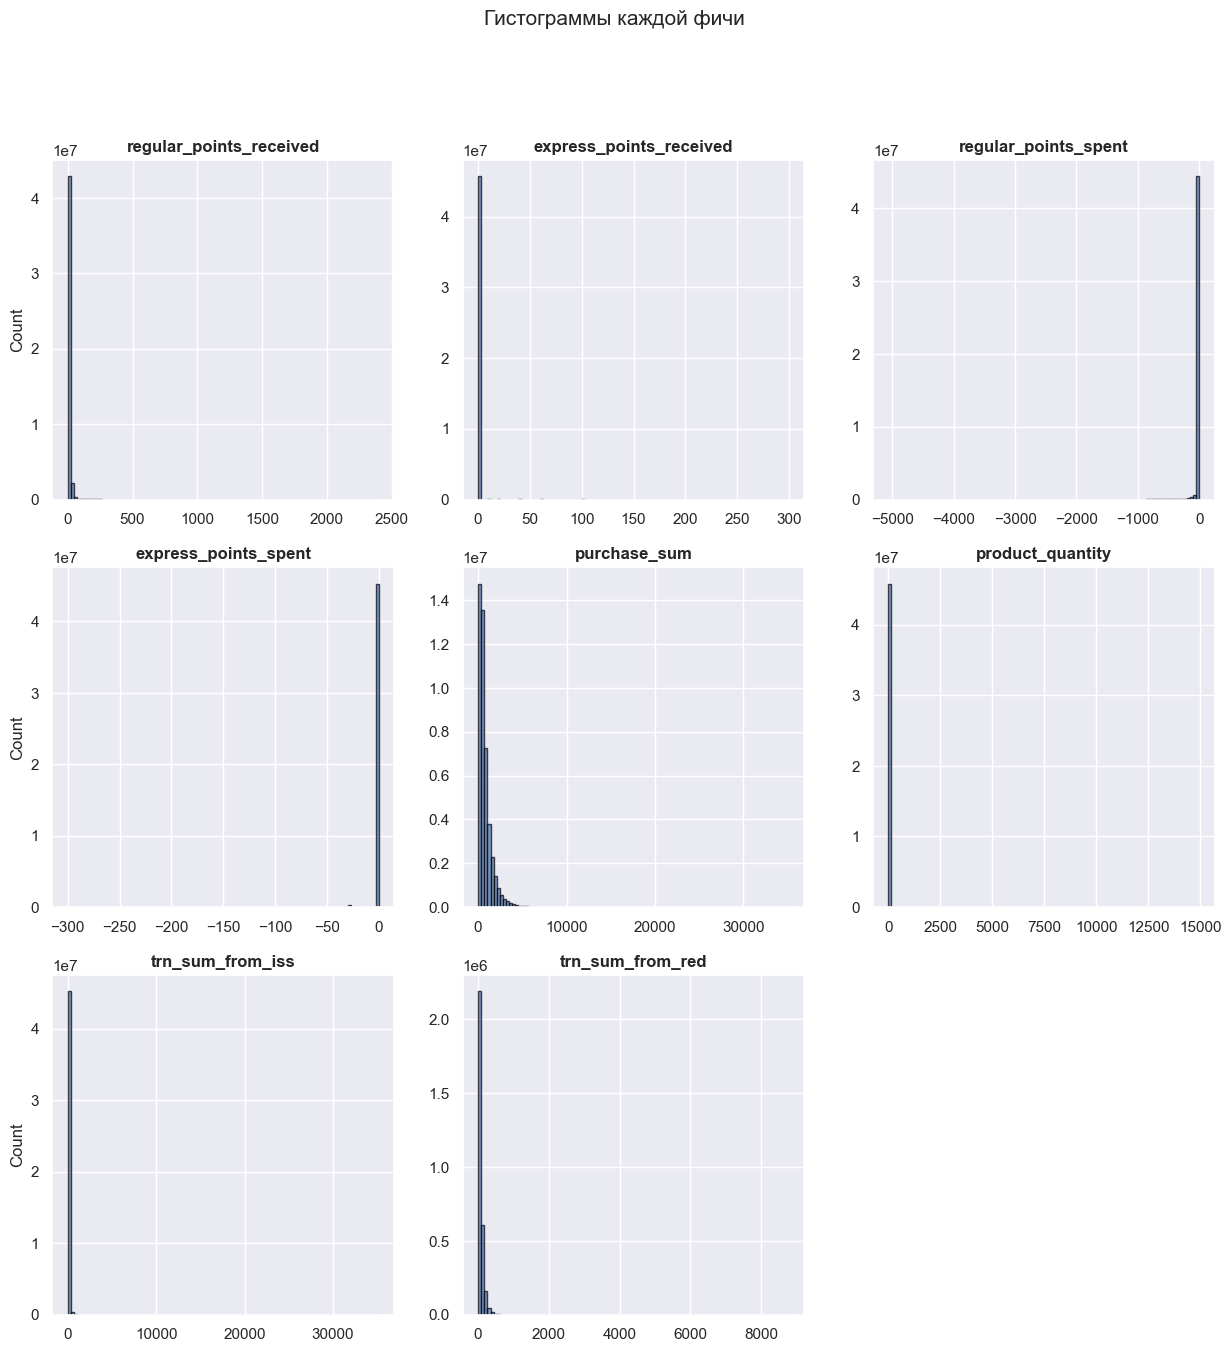

In [26]:
histmaker_for_numeric_df(purchases , bins = 100)

### Дропаю trn_sum_from_red в виду ~ 93% пропусков

In [27]:
purchases.drop(columns = 'trn_sum_from_red', inplace = True)

In [28]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45786568 entries, 0 to 45786567
Data columns (total 12 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   client_id                object 
 1   transaction_id           object 
 2   transaction_datetime     object 
 3   regular_points_received  float64
 4   express_points_received  float64
 5   regular_points_spent     float64
 6   express_points_spent     float64
 7   purchase_sum             float64
 8   store_id                 object 
 9   product_id               object 
 10  product_quantity         float64
 11  trn_sum_from_iss         float64
dtypes: float64(7), object(5)
memory usage: 4.1+ GB


## Products

In [29]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43038 entries, 0 to 43037
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        43038 non-null  object 
 1   level_1           43035 non-null  object 
 2   level_2           43035 non-null  object 
 3   level_3           43035 non-null  object 
 4   level_4           43035 non-null  object 
 5   segment_id        41466 non-null  float64
 6   brand_id          37838 non-null  object 
 7   vendor_id         43004 non-null  object 
 8   netto             43035 non-null  float64
 9   is_own_trademark  43038 non-null  int64  
 10  is_alcohol        43038 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 3.6+ MB


In [30]:
products.describe()

,segment_id,netto,is_own_trademark,is_alcohol
count,41466.000000,43035.000000,43038.000000,43038.000000
mean,153.918222,0.536966,0.035178,0.055602
std,82.271376,8.274367,0.184232,0.229154
min,1.000000,0.000000,0.000000,0.000000
25%,105.000000,0.150000,0.000000,0.000000
50%,148.000000,0.300000,0.000000,0.000000
75%,214.000000,0.500000,0.000000,0.000000
max,321.000000,1150.000000,1.000000,1.000000


In [31]:
products.isna().sum()

product_id             0
level_1                3
level_2                3
level_3                3
level_4                3
segment_id          1572
brand_id            5200
vendor_id             34
netto                  3
is_own_trademark       0
is_alcohol             0
dtype: int64

### Краткое саммери - товары достаточно легкие, практически все под собственной маркой, алкоголя не так много

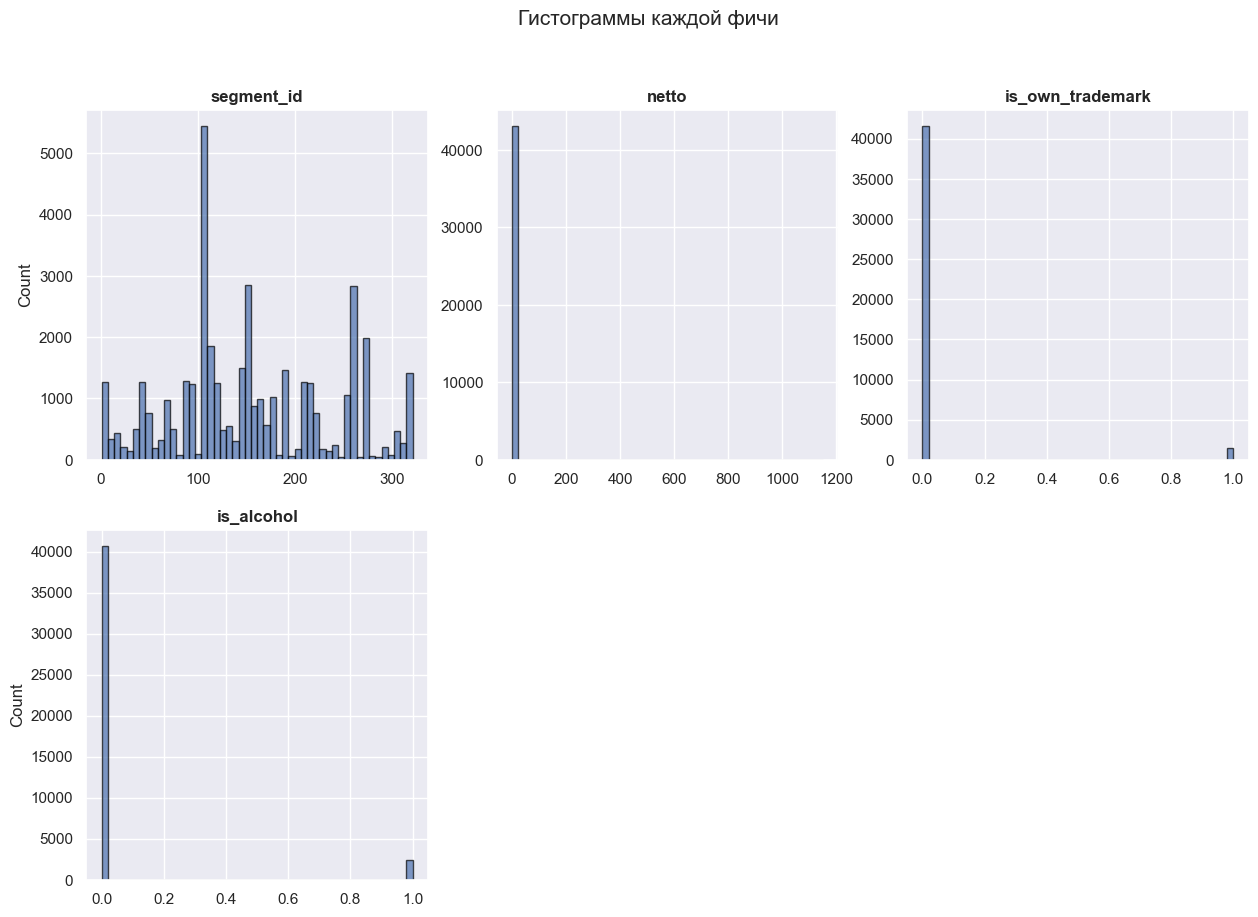

In [32]:
histmaker_for_numeric_df(products, bins = 50)

### Заменим пропуски самыми популярными значениями в столбцах

In [33]:
for column in products.columns:
    if products[column].isna().any():  # проверяем, есть ли пропуски
        most_frequent_value = products[column].mode()[0]  # Мода
        products[column].fillna(most_frequent_value, inplace=True)

In [34]:
products.isna().sum()

product_id          0
level_1             0
level_2             0
level_3             0
level_4             0
segment_id          0
brand_id            0
vendor_id           0
netto               0
is_own_trademark    0
is_alcohol          0
dtype: int64

In [35]:
uplift_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200039 entries, 0 to 200038
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   client_id      200039 non-null  object
 1   treatment_flg  200039 non-null  int64 
 2   target         200039 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [36]:
uplift_train.describe()

,treatment_flg,target
count,200039.000000,200039.000000
mean,0.499808,0.619889
std,0.500001,0.485415
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


### Группы в рамках А/Б теста поделены равномерно, покупатели чаще совершают целевое действие

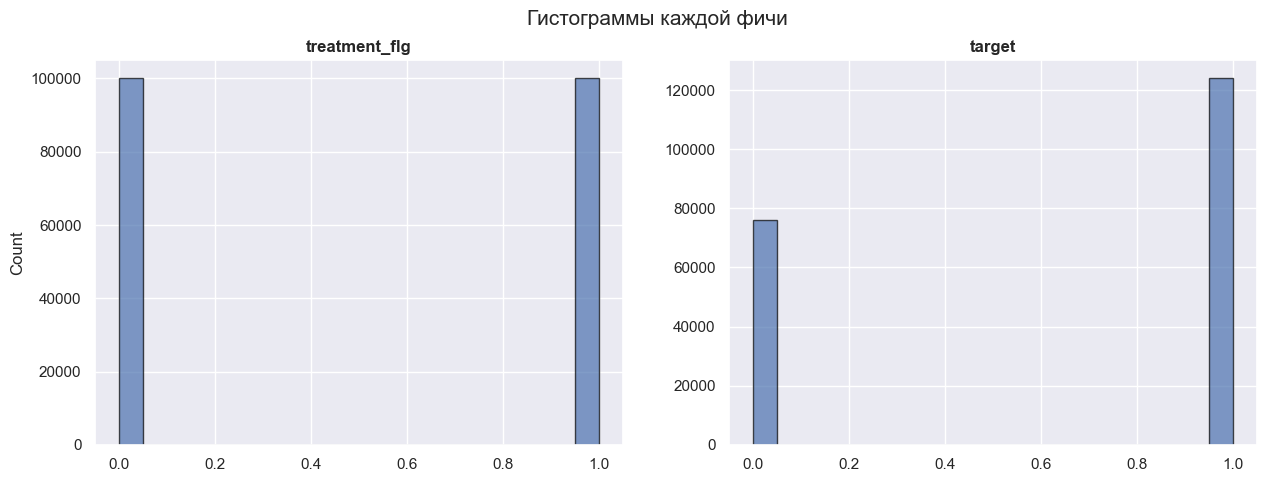

In [37]:
histmaker_for_numeric_df(uplift_train)

### Глянем на то, как распределены целевые действия
- **1)** Совокупно
- **2)** В контрольной группе
- **3)** В тестовой группе

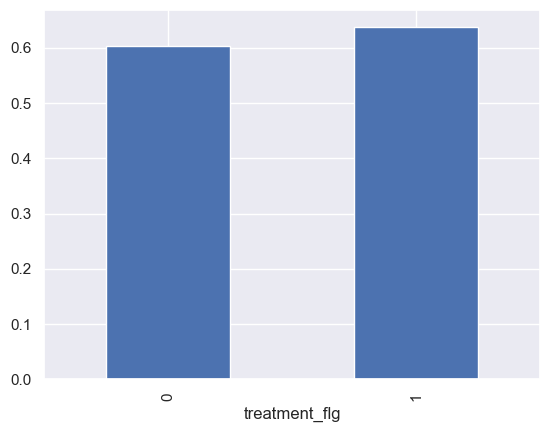

In [38]:
uplift_train.groupby('treatment_flg')['target'].mean().plot(kind = 'bar');

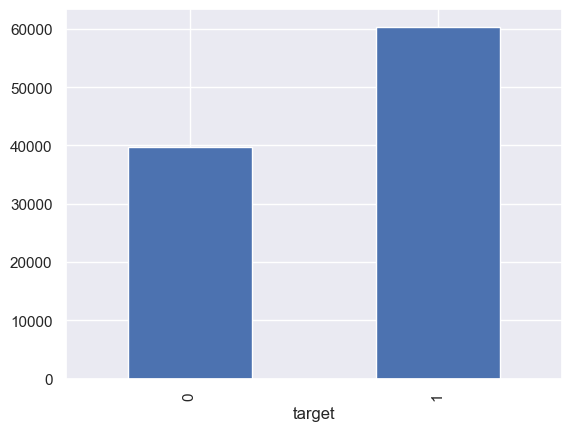

In [39]:
uplift_train[uplift_train['treatment_flg'] == 0].groupby('target')['client_id'].count().plot(kind = 'bar');

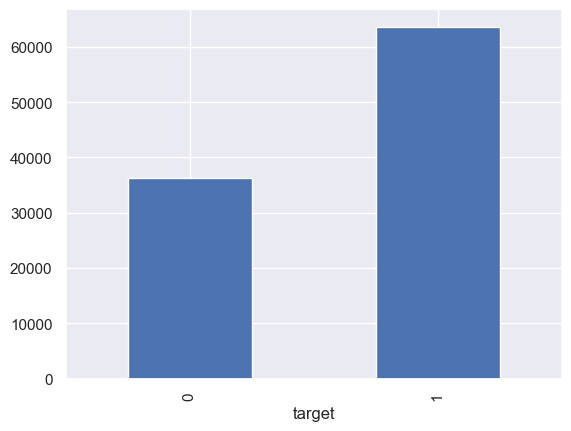

In [40]:
uplift_train[uplift_train['treatment_flg'] == 1].groupby('target')['client_id'].count().plot(kind = 'bar');

# Feature Engineering

## Clients

In [41]:
clients

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05,2018-01-04,45,U
1,000036f903,2017-04-10,2017-04-23,72,F
2,000048b7a6,2018-12-15,2019-06-13,68,F
3,000073194a,2017-05-23,2017-11-24,60,F
4,00007c7133,2017-05-22,2018-12-31,67,U
...,...,...,...,...,...
400157,fffece623e,2018-05-13,2018-12-27,67,U
400158,ffff3dfff8,2018-11-01,2018-12-07,56,F
400159,ffffaab9da,2017-08-25,2017-12-08,23,F
400160,ffffeb5619,2017-12-05,2018-06-03,62,U


In [42]:
clients_feature = clients.copy()

In [43]:
def fix_age(df_clients):
    # Вычисляем медиану по столбцу 'age', игнорируя ненормальные значения (меньше 0 или больше/равно 100)
    median_age = df_clients['age'][(df_clients['age'] > 0) & (df_clients['age'] < 100)].median()
    
    # Заполняем значения, которые меньше 0 или больше либо равны 100, а также равны 0, медианой
    df_clients['age'] = df_clients['age'].apply(lambda x: median_age if x <= 0 or x >= 100 else x)
    
    return df_clients

In [44]:
clients_feature = fix_age(clients_feature)
clients_feature

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05,2018-01-04,45.0,U
1,000036f903,2017-04-10,2017-04-23,72.0,F
2,000048b7a6,2018-12-15,2019-06-13,68.0,F
3,000073194a,2017-05-23,2017-11-24,60.0,F
4,00007c7133,2017-05-22,2018-12-31,67.0,U
...,...,...,...,...,...
400157,fffece623e,2018-05-13,2018-12-27,67.0,U
400158,ffff3dfff8,2018-11-01,2018-12-07,56.0,F
400159,ffffaab9da,2017-08-25,2017-12-08,23.0,F
400160,ffffeb5619,2017-12-05,2018-06-03,62.0,U


In [45]:
clients_feature['first_issue_date'] = pd.to_datetime(clients_feature['first_issue_date'])
clients_feature['first_redeem_date'] = pd.to_datetime(clients_feature['first_redeem_date']) 

In [46]:
clients_feature['issue_redeem_days_diff'] = clients_feature['first_redeem_date'] - clients_feature['first_issue_date']
clients_feature['issue_redeem_days_diff'] = clients_feature['issue_redeem_days_diff'].dt.days

### first_issues

In [47]:
clients_feature['first_issue_year'] = clients_feature['first_issue_date'].dt.year
clients_feature['first_issue_month'] = clients_feature['first_issue_date'].dt.month
clients_feature['first_issue_day'] = clients_feature['first_issue_date'].dt.day

### first_redeems

In [48]:
clients_feature['first_redeem_year'] = clients_feature['first_redeem_date'].dt.year
clients_feature['first_redeem_month'] = clients_feature['first_redeem_date'].dt.month
clients_feature['first_redeem_day'] = clients_feature['first_redeem_date'].dt.day

In [49]:
clients_feature.drop(columns=['first_issue_date', 'first_redeem_date'], inplace=True)

In [50]:
clients_feature

,client_id,age,gender,issue_redeem_days_diff,first_issue_year,first_issue_month,first_issue_day,first_redeem_year,first_redeem_month,first_redeem_day
0,000012768d,45.0,U,152,2017,8,5,2018,1,4
1,000036f903,72.0,F,13,2017,4,10,2017,4,23
2,000048b7a6,68.0,F,180,2018,12,15,2019,6,13
3,000073194a,60.0,F,185,2017,5,23,2017,11,24
4,00007c7133,67.0,U,588,2017,5,22,2018,12,31
...,...,...,...,...,...,...,...,...,...,...
400157,fffece623e,67.0,U,228,2018,5,13,2018,12,27
400158,ffff3dfff8,56.0,F,36,2018,11,1,2018,12,7
400159,ffffaab9da,23.0,F,105,2017,8,25,2017,12,8
400160,ffffeb5619,62.0,U,180,2017,12,5,2018,6,3


## Purchases

In [51]:
purchases['transaction_datetime'] = pd.to_datetime(purchases['transaction_datetime'])

In [52]:
purchases.dtypes

client_id                          object
transaction_id                     object
transaction_datetime       datetime64[ns]
regular_points_received           float64
express_points_received           float64
regular_points_spent              float64
express_points_spent              float64
purchase_sum                      float64
store_id                           object
product_id                         object
product_quantity                  float64
trn_sum_from_iss                  float64
dtype: object

### Фичи По покупкам клиента

In [53]:
def generate_purchase_features(purchases):
    tqdm.pandas()

    # Убедимся, что колонка 'transaction_datetime' в формате datetime
    purchases['transaction_datetime'] = pd.to_datetime(purchases['transaction_datetime'])
    
    # Группировка по клиентам
    grouped = purchases.groupby('client_id')
    
    # Базовые статистики
    features = grouped['purchase_sum'].agg(
        total_purchase_sum='sum',
        total_purchase_count='count',
        avg_purchase_sum='mean',
        max_purchase_sum='max',
        min_purchase_sum='min',
        std_purchase_sum='std'
    ).reset_index()

    # Добавление временных метрик
    purchases['days'] = purchases['transaction_datetime'].dt.date
    purchases['days'] = pd.to_datetime(purchases['days'])

    # Дни между покупками
    days_diff = grouped['days'].progress_apply(lambda x: x.sort_values().diff().dt.days)
    avg_days_between = days_diff.groupby('client_id').mean().rename("avg_days_between_purchases")
    max_days_between = days_diff.groupby('client_id').max().rename("max_days_between_purchases")
    min_days_between = days_diff.groupby('client_id').min().rename("min_days_between_purchases")
    
    # Присоединение временных метрик
    features = features.merge(avg_days_between, on='client_id', how='left')
    features = features.merge(max_days_between, on='client_id', how='left')
    features = features.merge(min_days_between, on='client_id', how='left')
    
    # Частота покупок (в среднем покупок в неделю)
    time_span = grouped['transaction_datetime'].progress_apply(lambda x: (x.max() - x.min()).days + 1).rename("time_span_days")
    features = features.merge(time_span, on='client_id', how='left')
    features['purchase_frequency_weekly'] = features['total_purchase_count'] / (features['time_span_days'] / 7)
    
    # Частота покупок в месяц
    features['purchase_frequency_monthly'] = features['total_purchase_count'] / (features['time_span_days'] / 30)
    
    return features

In [54]:
purchase_features = generate_purchase_features(purchases)

100%|████████████████████████████████| 400162/400162 [00:10<00:00, 38040.44it/s]


In [55]:
purchase_features

,client_id,total_purchase_sum,total_purchase_count,avg_purchase_sum,max_purchase_sum,min_purchase_sum,std_purchase_sum,avg_days_between_purchases,max_days_between_purchases,min_days_between_purchases,time_span_days,purchase_frequency_weekly,purchase_frequency_monthly
0,000012768d,40809.00,52,784.788462,1007.00,419.00,209.342794,2.019608,82.0,0.0,104,3.500000,15.000000
1,000036f903,58765.00,162,362.746914,700.00,58.00,160.472064,0.677019,13.0,0.0,109,10.403670,44.587156
2,000048b7a6,29724.00,56,530.785714,1204.00,113.00,324.459367,1.581818,26.0,0.0,87,4.505747,19.310345
3,000073194a,62719.92,82,764.877073,1728.75,130.84,468.586957,1.370370,22.0,0.0,111,5.171171,22.162162
4,00007c7133,53998.72,83,650.586988,1043.84,319.00,264.245381,1.219512,24.0,0.0,101,5.752475,24.653465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400157,fffece623e,43103.46,117,368.405641,810.00,29.00,211.228897,0.956897,17.0,0.0,112,7.312500,31.339286
400158,ffff3dfff8,65810.71,96,685.528229,1426.02,15.00,441.584121,1.178947,39.0,0.0,113,5.946903,25.486726
400159,ffffaab9da,41092.00,60,684.866667,866.00,221.00,223.980059,0.847458,19.0,0.0,51,8.235294,35.294118
400160,ffffeb5619,279485.68,99,2823.087677,3665.63,216.00,909.557437,0.234694,7.0,0.0,23,30.130435,129.130435


### Фичи по покупкам клиента в зависимости от времени

In [56]:
def generate_weekday_month_features(purchases):
    purchases['transaction_datetime'] = pd.to_datetime(purchases['transaction_datetime'])
    purchases['weekday'] = purchases['transaction_datetime'].dt.weekday  # День недели (0 - Пн, 6 - Вс)
    purchases['month'] = purchases['transaction_datetime'].dt.month      # Месяц (1 - Янв, 12 - Дек)
    
    grouped = purchases.groupby('client_id')
    
    # Фичи по дням недели
    weekday_features = purchases.pivot_table(
        index='client_id',
        columns='weekday',
        values='purchase_sum',
        aggfunc=['count', 'sum'],
        fill_value=0
    )
    weekday_features.columns = [
        f"purchases_weekday_{col[1]}" if col[0] == 'count' else f"purchase_sum_weekday_{col[1]}"
        for col in weekday_features.columns
    ]
    weekday_features = weekday_features.reset_index()
    
    # Фичи по месяцам
    month_features = purchases.pivot_table(
        index='client_id',
        columns='month',
        values='purchase_sum',
        aggfunc=['count', 'sum'],
        fill_value=0
    )
    month_features.columns = [
        f"purchases_month_{col[1]}" if col[0] == 'count' else f"purchase_sum_month_{col[1]}"
        for col in month_features.columns
    ]
    month_features = month_features.reset_index()
    
    # Объединение всех фич
    features = weekday_features.merge(month_features, on='client_id', how='outer')
    
    return features

In [57]:
purchases['transaction_datetime'] = pd.to_datetime(purchases['transaction_datetime'])
unique_months = purchases['transaction_datetime'].dt.to_period('M').unique()
print(unique_months)

<PeriodArray>
['2018-12', '2019-03', '2018-11', '2019-01', '2019-02']
Length: 5, dtype: period[M]


In [58]:
weekday_month_features = generate_weekday_month_features(purchases)

In [59]:
weekday_month_features

,client_id,purchases_weekday_0,purchases_weekday_1,purchases_weekday_2,purchases_weekday_3,purchases_weekday_4,purchases_weekday_5,purchases_weekday_6,purchase_sum_weekday_0,purchase_sum_weekday_1,...,purchases_month_1,purchases_month_2,purchases_month_3,purchases_month_11,purchases_month_12,purchase_sum_month_1,purchase_sum_month_2,purchase_sum_month_3,purchase_sum_month_11,purchase_sum_month_12
0,000012768d,0,0,0,6,16,19,11,0.00,0.00,...,0,0,22,0,30,0.00,0.00,15362.00,0.00,25447.00
1,000036f903,12,42,24,16,22,4,42,3918.00,16849.00,...,33,50,22,5,52,10713.00,18350.00,7303.00,1205.00,21194.00
2,000048b7a6,5,12,9,5,0,16,9,565.00,6224.00,...,25,20,2,0,9,17150.00,7885.00,684.00,0.00,4005.00
3,000073194a,8,0,1,24,15,24,10,6547.32,0.00,...,42,27,4,2,7,36242.37,22659.16,1122.91,958.00,1737.48
4,00007c7133,15,8,9,12,8,16,15,6897.00,8000.00,...,12,17,8,8,38,9120.00,11743.72,3040.00,2552.00,27543.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400157,fffece623e,22,4,40,34,6,11,0,6338.00,539.94,...,35,28,5,31,18,12402.06,7279.28,736.00,18711.16,3974.96
400158,ffff3dfff8,7,6,33,17,10,13,10,2115.91,1370.20,...,9,34,7,33,13,2240.20,19303.85,3541.99,35791.60,4933.07
400159,ffffaab9da,11,14,0,11,15,6,3,6346.00,12124.00,...,40,14,6,0,0,27468.00,12124.00,1500.00,0.00,0.00
400160,ffffeb5619,0,26,28,0,11,24,10,0.00,87560.46,...,0,70,29,0,0,0.00,221308.58,58177.10,0.00,0.00


### Любимые месяца, недели, дни и тд

In [60]:
def analyze_purchase_behavior(purchases):
    # Включаем tqdm для отслеживания прогресса
    tqdm.pandas()

    # 1. День недели, когда чаще всего совершаются покупки
    most_frequent_day = purchases.groupby('client_id')['weekday'].agg(lambda x: x.mode()[0]).progress_apply(lambda x: x)

    # 2. День недели с максимальной суммой покупок
    max_purchase_day = purchases.groupby('client_id').progress_apply(
        lambda x: x.groupby('weekday')['purchase_sum'].sum().idxmax()
    )

    # 3. Доля покупок по дням недели
    purchase_counts_weekday = purchases.groupby(['client_id', 'weekday']).size().unstack(fill_value=0)
    total_purchases_weekday = purchase_counts_weekday.sum(axis=1)
    purchase_fractions_weekday = purchase_counts_weekday.divide(total_purchases_weekday, axis=0)

    # 4. Месяц, когда чаще всего совершаются покупки
    most_frequent_month = purchases.groupby('client_id')['month'].agg(lambda x: x.mode()[0]).progress_apply(lambda x: x)

    # 5. Месяц с максимальной суммой покупок
    max_purchase_month = purchases.groupby('client_id').progress_apply(
        lambda x: x.groupby('month')['purchase_sum'].sum().idxmax()
    )

    # 6. Доля покупок по месяцам
    purchase_counts_month = purchases.groupby(['client_id', 'month']).size().unstack(fill_value=0)
    total_purchases_month = purchase_counts_month.sum(axis=1)
    purchase_fractions_month = purchase_counts_month.divide(total_purchases_month, axis=0)

    # 7. Количество уникальных продуктов, купленных клиентом
    unique_products = purchases.groupby('client_id')['product_id'].nunique().progress_apply(lambda x: x)

    # Собираем все вычисленные столбцы
    purchase_stats = pd.DataFrame({
        'most_frequent_day': most_frequent_day,
        'max_purchase_day': max_purchase_day,
        'monday_fraction': purchase_fractions_weekday[0],
        'tuesday_fraction': purchase_fractions_weekday[1],
        'wednesday_fraction': purchase_fractions_weekday[2],
        'thursday_fraction': purchase_fractions_weekday[3],
        'friday_fraction': purchase_fractions_weekday[4],
        'saturday_fraction': purchase_fractions_weekday[5],
        'sunday_fraction': purchase_fractions_weekday[6],
        'most_frequent_month': most_frequent_month,
        'max_purchase_month': max_purchase_month,
        'january_fraction': purchase_fractions_month[1],
        'february_fraction': purchase_fractions_month[2],
        'march_fraction': purchase_fractions_month[3],
        'november_fraction': purchase_fractions_month[11],
        'december_fraction': purchase_fractions_month[12],
        'unique_products': unique_products
    })

    # Присоединяем данные о клиентах по client_id
    #purchase_stats = purchase_stats.merge(clients, on='client_id', how='left')

    return purchase_stats

In [61]:
purchase_stats = analyze_purchase_behavior(purchases)

100%|██████████████████████████████| 400162/400162 [00:00<00:00, 3583685.27it/s]


In [62]:
purchase_stats

,most_frequent_day,max_purchase_day,monday_fraction,tuesday_fraction,wednesday_fraction,thursday_fraction,friday_fraction,saturday_fraction,sunday_fraction,most_frequent_month,max_purchase_month,january_fraction,february_fraction,march_fraction,november_fraction,december_fraction,unique_products
client_id,,,,,,,,,,,,,,,,,
000012768d,5,5,0.000000,0.000000,0.000000,0.115385,0.307692,0.365385,0.211538,12,12,0.000000,0.000000,0.423077,0.000000,0.576923,46
000036f903,1,1,0.074074,0.259259,0.148148,0.098765,0.135802,0.024691,0.259259,12,12,0.203704,0.308642,0.135802,0.030864,0.320988,96
000048b7a6,5,2,0.089286,0.214286,0.160714,0.089286,0.000000,0.285714,0.160714,1,1,0.446429,0.357143,0.035714,0.000000,0.160714,44
000073194a,3,4,0.097561,0.000000,0.012195,0.292683,0.182927,0.292683,0.121951,1,1,0.512195,0.329268,0.048780,0.024390,0.085366,68
00007c7133,5,5,0.180723,0.096386,0.108434,0.144578,0.096386,0.192771,0.180723,12,12,0.144578,0.204819,0.096386,0.096386,0.457831,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffece623e,2,3,0.188034,0.034188,0.341880,0.290598,0.051282,0.094017,0.000000,1,11,0.299145,0.239316,0.042735,0.264957,0.153846,83
ffff3dfff8,2,2,0.072917,0.062500,0.343750,0.177083,0.104167,0.135417,0.104167,2,11,0.093750,0.354167,0.072917,0.343750,0.135417,86
ffffaab9da,4,4,0.183333,0.233333,0.000000,0.183333,0.250000,0.100000,0.050000,1,1,0.666667,0.233333,0.100000,0.000000,0.000000,53


### ID любимых продуктов/сегментов/брендов и тд

In [63]:
def id_function(purchases, products):
    # Включаем tqdm для отслеживания прогресса
    tqdm.pandas()

    # 1. ID продукта, который чаще всего покупался (для каждого клиента)
    most_frequent_product = purchases.groupby('client_id')['product_id'].agg(lambda x: x.mode()[0]).reset_index(name='most_frequent_product')

    # 2. ID бренда, чьи продукты чаще всего покупались (для каждого клиента)
    most_frequent_brand = purchases.merge(products[['product_id', 'brand_id']], on='product_id', how='left') \
                                    .groupby('client_id').apply(lambda x: x['brand_id'].mode()[0]) \
                                    .reset_index(name='most_frequent_brand')

    # 3. ID сегмента, чьи продукты чаще всего покупались (для каждого клиента)
    most_frequent_segment = purchases.merge(products[['product_id', 'segment_id']], on='product_id', how='left') \
                                      .groupby('client_id').apply(lambda x: x['segment_id'].mode()[0]) \
                                      .reset_index(name='most_frequent_segment')

    # 4. Доля уникальных продуктов в общем количестве покупок (для каждого клиента)
    unique_products = purchases.groupby('client_id')['product_id'].nunique().reset_index(name='unique_products')
    total_purchases = purchases.groupby('client_id')['product_id'].count().reset_index(name='total_purchases')
    unique_product_fraction = unique_products.merge(total_purchases, on='client_id')
    unique_product_fraction['unique_product_fraction'] = unique_product_fraction['unique_products'] / unique_product_fraction['total_purchases']

    # 5. ID магазина, где чаще всего совершались покупки (для каждого клиента)
    most_frequent_store = purchases.groupby('client_id')['store_id'].agg(lambda x: x.mode()[0]).reset_index(name='most_frequent_store')

    # Объединяем все результаты в один DataFrame
    result = most_frequent_product \
                .merge(most_frequent_brand, on='client_id', how='left') \
                .merge(most_frequent_segment, on='client_id', how='left') \
                .merge(unique_product_fraction[['client_id', 'unique_product_fraction']], on='client_id', how='left') \
                .merge(most_frequent_store, on='client_id', how='left')

    return result

In [64]:
result_id_function = id_function(purchases, products)
result_id_function

,client_id,most_frequent_product,most_frequent_brand,most_frequent_segment,unique_product_fraction,most_frequent_store
0,000012768d,057ea8df98,4da2dc345f,1.0,0.884615,017c89b915
1,000036f903,449e431b58,4da2dc345f,150.0,0.592593,6381a55c22
2,000048b7a6,13f3112f7c,c766c1eb8c,230.0,0.785714,1a01e2a7d8
3,000073194a,212f305c8b,f3ac3488c1,75.0,0.829268,9e8fcd116d
4,00007c7133,53fc95e177,4da2dc345f,281.0,0.771084,01ec6c98d7
...,...,...,...,...,...,...
400157,fffece623e,4009f09b04,4da2dc345f,105.0,0.709402,75156f2a80
400158,ffff3dfff8,f15ac9f557,4da2dc345f,14.0,0.895833,3465db4011
400159,ffffaab9da,f4fd807aab,0f6529e87b,230.0,0.883333,46972d1c44
400160,ffffeb5619,35d4f25bdf,0d6f137fb6,104.0,0.757576,b77dc8c2a3


### Все, что касается метрик покупков клиентов

In [67]:
def analyze_purchase_metrics(purchases, products):
    # 1. Среднее количество единиц товара в одной покупке для каждого клиента
    avg_quantity_per_purchase = purchases.groupby('client_id')['product_quantity'].mean().reset_index(name='avg_quantity_per_purchase')

    # 2. Суммарное количество товаров по каждой покупке
    total_quantity_per_purchase = purchases.groupby('transaction_id').agg({'product_quantity': 'sum', 'client_id': 'first'}).reset_index()

    # 3. Максимальное количество товаров в одной покупке для каждого клиента
    max_quantity_per_purchase = total_quantity_per_purchase.groupby('client_id')['product_quantity'].max().reset_index(name='max_quantity_per_purchase')

    # 4. Средняя сумма покупки для каждого клиента
    avg_purchase_sum = purchases.groupby('client_id')['purchase_sum'].mean().reset_index(name='avg_purchase_sum')

    # Фильтрация алкогольных товаров и продуктов собственной марки
    purchases = purchases.merge(products[['product_id', 'is_own_trademark', 'is_alcohol']], on='product_id', how='left')

    # 5. Общая сумма покупок алкогольной продукции
    alcohol_purchases = purchases[purchases['is_alcohol'] == 1]
    total_alcohol_purchase_sum = alcohol_purchases.groupby('client_id')['purchase_sum'].sum().reset_index(name='total_alcohol_purchase_sum')

    # 6. Количество покупок алкогольной продукции
    alcohol_purchase_count = alcohol_purchases.groupby('client_id')['transaction_id'].nunique().reset_index(name='alcohol_purchase_count')

    # 7. Общая сумма покупок продуктов собственной марки
    private_label_purchases = purchases[purchases['is_own_trademark'] == 1]
    total_private_label_purchase_sum = private_label_purchases.groupby('client_id')['purchase_sum'].sum().reset_index(name='total_private_label_purchase_sum')

    # 8. Количество покупок продуктов собственной марки
    private_label_purchase_count = private_label_purchases.groupby('client_id')['transaction_id'].nunique().reset_index(name='private_label_purchase_count')

    # 9. Доля покупок алкогольной продукции в общем количестве покупок
    total_purchases_count = purchases.groupby('client_id')['transaction_id'].nunique().reset_index(name='total_purchase_count')
    alcohol_purchase_ratio = alcohol_purchase_count.merge(total_purchases_count, on='client_id')
    alcohol_purchase_ratio['alcohol_purchase_ratio'] = alcohol_purchase_ratio['alcohol_purchase_count'] / alcohol_purchase_ratio['total_purchase_count']

    # 10. Доля покупок продуктов собственной марки в общем количестве покупок
    private_label_purchase_ratio = private_label_purchase_count.merge(total_purchases_count, on='client_id')
    private_label_purchase_ratio['private_label_purchase_ratio'] = private_label_purchase_ratio['private_label_purchase_count'] / private_label_purchase_ratio['total_purchase_count']

    # Объединяем все результаты в один DataFrame
    result_df = avg_quantity_per_purchase \
        .merge(max_quantity_per_purchase, on='client_id') \
        .merge(avg_purchase_sum, on='client_id') \
        .merge(total_alcohol_purchase_sum, on='client_id', how='left') \
        .merge(alcohol_purchase_count, on='client_id', how='left') \
        .merge(total_private_label_purchase_sum, on='client_id', how='left') \
        .merge(private_label_purchase_count, on='client_id', how='left') \
        .merge(alcohol_purchase_ratio[['client_id', 'alcohol_purchase_ratio']], on='client_id', how='left') \
        .merge(private_label_purchase_ratio[['client_id', 'private_label_purchase_ratio']], on='client_id', how='left')

    return result_df

In [68]:
purchase_metrics = analyze_purchase_metrics(purchases, products)

In [69]:
purchase_metrics

,client_id,avg_quantity_per_purchase,max_quantity_per_purchase,avg_purchase_sum,total_alcohol_purchase_sum,alcohol_purchase_count,total_private_label_purchase_sum,private_label_purchase_count,alcohol_purchase_ratio,private_label_purchase_ratio
0,000012768d,1.038462,21.0,784.788462,NaN,NaN,3391.00,3.0,NaN,0.750000
1,000036f903,1.043210,12.0,362.746914,561.00,1.0,4994.00,12.0,0.031250,0.375000
2,000048b7a6,1.625000,20.0,530.785714,NaN,NaN,2912.00,2.0,NaN,0.250000
3,000073194a,1.548780,17.0,764.877073,5353.35,9.0,2640.13,3.0,0.529412,0.176471
4,00007c7133,1.000000,10.0,650.586988,NaN,NaN,5886.84,8.0,NaN,0.727273
...,...,...,...,...,...,...,...,...,...,...
400157,fffece623e,1.076923,16.0,368.405641,179.99,1.0,7337.47,12.0,0.041667,0.500000
400158,ffff3dfff8,1.250000,24.0,685.528229,480.99,2.0,8044.65,8.0,0.117647,0.470588
400159,ffffaab9da,1.583333,22.0,684.866667,NaN,NaN,5129.00,4.0,NaN,0.571429
400160,ffffeb5619,1.101010,30.0,2823.087677,21694.89,5.0,33648.55,3.0,0.714286,0.428571


In [70]:
purchase_metrics.fillna(0 , inplace = True)

In [71]:
purchase_metrics.drop(columns = 'avg_purchase_sum' , inplace = True) # уже есть такая фича

### fillna(0) - так как NaN означает отсутствие покупки алкоголя

In [72]:
purchase_metrics

,client_id,avg_quantity_per_purchase,max_quantity_per_purchase,total_alcohol_purchase_sum,alcohol_purchase_count,total_private_label_purchase_sum,private_label_purchase_count,alcohol_purchase_ratio,private_label_purchase_ratio
0,000012768d,1.038462,21.0,0.00,0.0,3391.00,3.0,0.000000,0.750000
1,000036f903,1.043210,12.0,561.00,1.0,4994.00,12.0,0.031250,0.375000
2,000048b7a6,1.625000,20.0,0.00,0.0,2912.00,2.0,0.000000,0.250000
3,000073194a,1.548780,17.0,5353.35,9.0,2640.13,3.0,0.529412,0.176471
4,00007c7133,1.000000,10.0,0.00,0.0,5886.84,8.0,0.000000,0.727273
...,...,...,...,...,...,...,...,...,...
400157,fffece623e,1.076923,16.0,179.99,1.0,7337.47,12.0,0.041667,0.500000
400158,ffff3dfff8,1.250000,24.0,480.99,2.0,8044.65,8.0,0.117647,0.470588
400159,ffffaab9da,1.583333,22.0,0.00,0.0,5129.00,4.0,0.000000,0.571429
400160,ffffeb5619,1.101010,30.0,21694.89,5.0,33648.55,3.0,0.714286,0.428571


### Количество и сумма покупок больше чем заданное значение

In [73]:
def analyze_purchase_amounts_by_client(purchases, thresholds=[500, 750, 1000]):
    result = []
    
    # Для каждого клиента
    for client_id, group in purchases.groupby('client_id'):
        client_result = {'client_id': client_id}
        
        # Группировка по transaction_id для подсчета транзакций
        for threshold in thresholds:
            # 1. Количество транзакций, сумма которых превышает порог
            count = (group.groupby('transaction_id')['purchase_sum'].sum() > threshold).sum()
            
            # 2. Сумма всех транзакций, сумма которых превышает порог
            total_sum = group.groupby('transaction_id')['purchase_sum'].sum().loc[lambda x: x > threshold].sum()
            
            # Добавляем результаты в словарь для текущего клиента
            client_result[f'count_above_{threshold}'] = count
            client_result[f'sum_above_{threshold}'] = total_sum
        
        # Добавляем результаты для этого клиента в итоговый список
        result.append(client_result)
    
    # Преобразуем список в DataFrame для удобного вывода
    result_df = pd.DataFrame(result)
    return result_df

In [74]:
threshold = analyze_purchase_amounts_by_client(purchases, thresholds=[500, 750, 1000, 2000])
threshold

,client_id,count_above_500,sum_above_500,count_above_750,sum_above_750,count_above_1000,sum_above_1000,count_above_2000,sum_above_2000
0,000012768d,4,40809.00,4,40809.00,4,40809.00,4,40809.00
1,000036f903,26,57230.00,23,55149.00,21,53261.00,11,40187.00
2,000048b7a6,8,29724.00,6,28475.00,6,28475.00,4,24917.00
3,000073194a,13,61370.92,12,60728.62,8,57335.49,7,55394.49
4,00007c7133,10,53658.72,10,53658.72,10,53658.72,9,52033.72
...,...,...,...,...,...,...,...,...,...
400157,fffece623e,16,40978.89,13,39216.89,11,37469.89,7,32418.69
400158,ffff3dfff8,14,65354.56,12,64236.56,10,62558.36,7,58846.45
400159,ffffaab9da,6,40650.00,6,40650.00,5,39894.00,4,38394.00
400160,ffffeb5619,6,279053.68,6,279053.68,6,279053.68,6,279053.68


In [75]:
threshold.isna().sum()

client_id           0
count_above_500     0
sum_above_500       0
count_above_750     0
sum_above_750       0
count_above_1000    0
sum_above_1000      0
count_above_2000    0
sum_above_2000      0
dtype: int64

### Темп роста за последние 3 месяца

In [76]:
def calculate_growth_rate(purchases):
    # Преобразуем transaction_datetime в формат datetime, если это не сделано
    purchases['transaction_datetime'] = pd.to_datetime(purchases['transaction_datetime'])
    
    # Текущая дата (самая последняя дата в данных)
    current_date = purchases['transaction_datetime'].max()
    
    # Определяем дату 3 месяца назад
    three_months_ago = current_date - timedelta(days=90)
    
    # Даты для расчета последних 3 месяцев и предыдущих 3 месяцев
    last_3_months_start = three_months_ago
    last_3_months_end = current_date
    
    prev_3_months_start = last_3_months_start - timedelta(days=90)
    prev_3_months_end = last_3_months_start

    result = []

    # Для каждого клиента
    for client_id, group in purchases.groupby('client_id'):
        client_result = {'client_id': client_id}
        
        # Фильтруем покупки за последние 3 месяца
        last_3_months = group[(group['transaction_datetime'] >= last_3_months_start) &
                               (group['transaction_datetime'] < last_3_months_end)]
        
        # Фильтруем покупки за предыдущие 3 месяца
        prev_3_months = group[(group['transaction_datetime'] >= prev_3_months_start) &
                               (group['transaction_datetime'] < prev_3_months_end)]
        
        # Сумма покупок за последние 3 месяца
        sum_last_3_months = last_3_months['purchase_sum'].sum()

        # Сумма покупок за предыдущие 3 месяца
        sum_prev_3_months = prev_3_months['purchase_sum'].sum()
        
        # Рассчитываем темп роста
        if sum_prev_3_months > 0:
            growth_rate = ((sum_last_3_months - sum_prev_3_months) / sum_prev_3_months) * 100
        else:
            growth_rate = None  # Если за предыдущие 3 месяца покупок не было, то темп роста неопределен
        
        # Добавляем результаты для клиента
        client_result['growth_rate_last_3_months'] = growth_rate
        result.append(client_result)
    
    # Преобразуем результат в DataFrame
    result_df = pd.DataFrame(result)
    return result_df

In [79]:
growth_result = calculate_growth_rate(purchases)
growth_result

,client_id,growth_rate_last_3_months
0,000012768d,-39.631391
1,000036f903,418.904687
2,000048b7a6,542.172285
3,000073194a,2126.855328
4,00007c7133,262.436585
...,...,...
400157,fffece623e,25.273913
400158,ffff3dfff8,-38.400876
400159,ffffaab9da,NaN
400160,ffffeb5619,NaN


# Final Dataset createing

In [80]:
growth_result.isna().sum()

client_id                        0
growth_rate_last_3_months    92122
dtype: int64

In [81]:
growth_result.fillna(0, inplace = True) # значит не было покупок в последние 3 месяца

In [82]:
clients_feature

,client_id,age,gender,issue_redeem_days_diff,first_issue_year,first_issue_month,first_issue_day,first_redeem_year,first_redeem_month,first_redeem_day
0,000012768d,45.0,U,152,2017,8,5,2018,1,4
1,000036f903,72.0,F,13,2017,4,10,2017,4,23
2,000048b7a6,68.0,F,180,2018,12,15,2019,6,13
3,000073194a,60.0,F,185,2017,5,23,2017,11,24
4,00007c7133,67.0,U,588,2017,5,22,2018,12,31
...,...,...,...,...,...,...,...,...,...,...
400157,fffece623e,67.0,U,228,2018,5,13,2018,12,27
400158,ffff3dfff8,56.0,F,36,2018,11,1,2018,12,7
400159,ffffaab9da,23.0,F,105,2017,8,25,2017,12,8
400160,ffffeb5619,62.0,U,180,2017,12,5,2018,6,3


In [85]:
purchase_features

,client_id,total_purchase_sum,total_purchase_count,avg_purchase_sum,max_purchase_sum,min_purchase_sum,std_purchase_sum,avg_days_between_purchases,max_days_between_purchases,min_days_between_purchases,time_span_days,purchase_frequency_weekly,purchase_frequency_monthly
0,000012768d,40809.00,52,784.788462,1007.00,419.00,209.342794,2.019608,82.0,0.0,104,3.500000,15.000000
1,000036f903,58765.00,162,362.746914,700.00,58.00,160.472064,0.677019,13.0,0.0,109,10.403670,44.587156
2,000048b7a6,29724.00,56,530.785714,1204.00,113.00,324.459367,1.581818,26.0,0.0,87,4.505747,19.310345
3,000073194a,62719.92,82,764.877073,1728.75,130.84,468.586957,1.370370,22.0,0.0,111,5.171171,22.162162
4,00007c7133,53998.72,83,650.586988,1043.84,319.00,264.245381,1.219512,24.0,0.0,101,5.752475,24.653465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400157,fffece623e,43103.46,117,368.405641,810.00,29.00,211.228897,0.956897,17.0,0.0,112,7.312500,31.339286
400158,ffff3dfff8,65810.71,96,685.528229,1426.02,15.00,441.584121,1.178947,39.0,0.0,113,5.946903,25.486726
400159,ffffaab9da,41092.00,60,684.866667,866.00,221.00,223.980059,0.847458,19.0,0.0,51,8.235294,35.294118
400160,ffffeb5619,279485.68,99,2823.087677,3665.63,216.00,909.557437,0.234694,7.0,0.0,23,30.130435,129.130435


In [86]:
merged_df = clients_feature
merged_df = merged_df.merge(purchase_features, on='client_id', how='left')
merged_df = merged_df.merge(weekday_month_features, on='client_id', how='left')
merged_df = merged_df.merge(purchase_stats, on='client_id', how='left')
merged_df = merged_df.merge(result_id_function, on='client_id', how='left')
merged_df = merged_df.merge(purchase_metrics, on='client_id', how='left')
merged_df = merged_df.merge(threshold, on='client_id', how='left')
merged_df = merged_df.merge(growth_result, on='client_id', how='left')

In [87]:
merged_df

,client_id,age,gender,issue_redeem_days_diff,first_issue_year,first_issue_month,first_issue_day,first_redeem_year,first_redeem_month,first_redeem_day,...,private_label_purchase_ratio,count_above_500,sum_above_500,count_above_750,sum_above_750,count_above_1000,sum_above_1000,count_above_2000,sum_above_2000,growth_rate_last_3_months
0,000012768d,45.0,U,152,2017,8,5,2018,1,4,...,0.750000,4,40809.00,4,40809.00,4,40809.00,4,40809.00,-39.631391
1,000036f903,72.0,F,13,2017,4,10,2017,4,23,...,0.375000,26,57230.00,23,55149.00,21,53261.00,11,40187.00,418.904687
2,000048b7a6,68.0,F,180,2018,12,15,2019,6,13,...,0.250000,8,29724.00,6,28475.00,6,28475.00,4,24917.00,542.172285
3,000073194a,60.0,F,185,2017,5,23,2017,11,24,...,0.176471,13,61370.92,12,60728.62,8,57335.49,7,55394.49,2126.855328
4,00007c7133,67.0,U,588,2017,5,22,2018,12,31,...,0.727273,10,53658.72,10,53658.72,10,53658.72,9,52033.72,262.436585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400157,fffece623e,67.0,U,228,2018,5,13,2018,12,27,...,0.500000,16,40978.89,13,39216.89,11,37469.89,7,32418.69,25.273913
400158,ffff3dfff8,56.0,F,36,2018,11,1,2018,12,7,...,0.470588,14,65354.56,12,64236.56,10,62558.36,7,58846.45,-38.400876
400159,ffffaab9da,23.0,F,105,2017,8,25,2017,12,8,...,0.571429,6,40650.00,6,40650.00,5,39894.00,4,38394.00,0.000000
400160,ffffeb5619,62.0,U,180,2017,12,5,2018,6,3,...,0.428571,6,279053.68,6,279053.68,6,279053.68,6,279053.68,0.000000


In [90]:
merged_df.isna().sum()

client_id                             0
age                                   0
gender                                0
issue_redeem_days_diff                0
first_issue_year                      0
first_issue_month                     0
first_issue_day                       0
first_redeem_year                     0
first_redeem_month                    0
first_redeem_day                      0
total_purchase_sum                    0
total_purchase_count                  0
avg_purchase_sum                      0
max_purchase_sum                      0
min_purchase_sum                      0
std_purchase_sum                    763
avg_days_between_purchases          763
max_days_between_purchases          763
min_days_between_purchases          763
time_span_days                        0
purchase_frequency_weekly             0
purchase_frequency_monthly            0
purchases_weekday_0                   0
purchases_weekday_1                   0
purchases_weekday_2                   0


In [89]:
#pd.set_option('display.max_rows', None)  
#pd.set_option('display.max_columns', None)

In [95]:
merged_df['avg_days_between_purchases'] = merged_df['avg_days_between_purchases'].fillna(merged_df['avg_days_between_purchases'].median())
merged_df['std_purchase_sum'] = merged_df['std_purchase_sum'].fillna(merged_df['std_purchase_sum'].median())
merged_df['max_days_between_purchases'] = merged_df['max_days_between_purchases'].fillna(merged_df['max_days_between_purchases'].median())
merged_df['min_days_between_purchases'] = merged_df['min_days_between_purchases'].fillna(merged_df['min_days_between_purchases'].median())

In [96]:
merged_df.isna().sum()

client_id                           0
age                                 0
gender                              0
issue_redeem_days_diff              0
first_issue_year                    0
first_issue_month                   0
first_issue_day                     0
first_redeem_year                   0
first_redeem_month                  0
first_redeem_day                    0
total_purchase_sum                  0
total_purchase_count                0
avg_purchase_sum                    0
max_purchase_sum                    0
min_purchase_sum                    0
std_purchase_sum                    0
avg_days_between_purchases          0
max_days_between_purchases          0
min_days_between_purchases          0
time_span_days                      0
purchase_frequency_weekly           0
purchase_frequency_monthly          0
purchases_weekday_0                 0
purchases_weekday_1                 0
purchases_weekday_2                 0
purchases_weekday_3                 0
purchases_we

In [97]:
merged_df.to_csv('feature.csv', index = False)